# Simple Linear Regression

We will use Pandas to work with dataframes and numpy to do the math.

In [1]:
import pandas as pd
import numpy as np

For linear regression we'll have a set of samples, each sample consists of a feature x_i and a label y_i. Linear regression will determine the weights  $w_0$ (intercept) and $w_1$ (the slope), to estimate a linear relation between the feature vector ($X$) and the label vector ($Y$). The estimate will be denoted $\hat Y$.

Pointwise:

$${\hat y}_i=x_0+w_1x_i$$

And in vector form:
$${\hat Y}=w_0+w_1 \cdot X$$


In [2]:
#Compute the prediction of the linear model giventhe wights and the input feature
def predictions_linear_reg(X, w_0, w_1):
    pred=w_0+w_1*X
    return pred

We will use the Mean Squared Error as cost measure. The formula is:

$$ mse=\frac{\sum_i^m(y_i-\hat{y}_i)^2}{m}$$

In [3]:
#Compute MSE
def get_mse(X, Y, w_0,w_1):
    #X is the feature vector (m,1)
    #Y is the labels vector (m,1)
    m=X.shape[0]
    pred=predictions_linear_reg(X, w_0, w_1)
    res=pred-Y
    sqrd=res**2
    MSE=np.sum(sqrd)/m
    return MSE

Now we write the linear regression algorithm. Since we are working with one variable, it is not difficult to obtain the exact formula for $w_0$ and $w_1$ that minimizes the MSE (all sums are from $1$ to $m$):

$$w_1=\frac{\sum x_iy_i - \frac{\sum x_i \sum y_i}{m} }{\sum x_i^2 - \frac{(\sum x_i)^2}{m}}$$

$$w_0= \sum y_i - w_1 \frac{x_i}{m}$$

In [4]:
## simple linear regression with exact formula
def linear_regression_simple_exact_formula(X, Y):
    m=Y.size
    sum_x=np.sum(X)
    sum_y=np.sum(Y)
    prod=X*Y
    sum_prod=np.sum(prod)
    sq_x=X*X
    sum_sq_x=np.sum(sq_x)
    sq_sum_x=sum_x**2
    prod_sum_x_y=sum_x*sum_y
    w_1=(sum_prod -prod_sum_x_y/m)/(sum_sq_x-sq_sum_x/m)
    w_0=(sum_y- w_1*sum_x)/m
    return w_0,w_1

To test this algorithm we are going to create a sample set.

In [5]:
#First we generate a random list of 10 numbers uniformily distribuited
X=np.random.uniform(0,1,[10,1])*100
print("The feature vector is: ")
print(X)
#Then we create the Y vector applying a linear function to X
Y=3*X+7
print("This is the image of X when we apply a linear function: ")
print(Y)
#Finally we add some noise to Y
for i in range(len(Y)):
    Y[i]+=np.random.uniform(-5,5)
print("The label (or output) vector is: ")    
print(Y)

The feature vector is: 
[[75.32820326]
 [86.78542324]
 [ 6.915271  ]
 [ 4.69260242]
 [73.36868774]
 [73.10051777]
 [70.75448857]
 [27.49252878]
 [11.611132  ]
 [91.7033386 ]]
This is the image of X when we apply a linear function: 
[[232.98460979]
 [267.35626972]
 [ 27.745813  ]
 [ 21.07780726]
 [227.10606323]
 [226.30155331]
 [219.26346571]
 [ 89.47758633]
 [ 41.833396  ]
 [282.1100158 ]]
The label (or output) vector is: 
[[228.69332955]
 [268.17423079]
 [ 27.0457362 ]
 [ 22.56053908]
 [229.506819  ]
 [230.39253229]
 [217.93742206]
 [ 89.50944265]
 [ 46.25265779]
 [284.290088  ]]


Let's apply our algorithm to this set:

In [6]:
wa_0, wa_1 =linear_regression_simple_exact_formula(X, Y)
print("wa_0: "+str(wa_0))
print("wa_1: "+str(wa_1))

wa_0: 8.342617038016352
wa_1: 2.991720297152594


Let's calculate the cost.

In [7]:
MSE=get_mse(X,Y,wa_0,wa_1)
print(MSE)

6.126215307990976


Now we will plot the sample points and the line obtained by the regression algorithm. We will use matplotlib.

In [8]:
import matplotlib.pyplot as plt

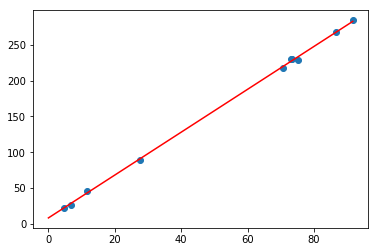

In [9]:
plt.scatter(X,Y)
t = np.arange(0.0, np.max(X), 0.01)
plt.plot(t,wa_1*t+wa_0,'-',color='r')

plt.show()

We procede now to write the gradient descent algorithm. We need to calculate the derivative of the MSE, with respect to the weights $w_0,w_1$:

$$\frac{d}{dw_0}mse=-\frac{2}{m}\sum(y_i-\hat{y}_i)$$

$$\frac{d}{dw_1}mse=-\frac{2}{m}\sum x_i(y_i-\hat{y}_i)$$

In [10]:
def derivative(X,Y,w_0,w_1):
    m=X.shape[0]
    error=Y- predictions_linear_reg(X, w_0,w_1)
    dw_0=-2*np.sum(error)/m
    dw_1=-2*np.sum(X*error )/m
    return dw_0, dw_1

Recall that in this case we shall usa an hyperparameter: the learning rate.
We update the weights as follows:

$$w_j:=w_j- \eta \frac{d}{dw_j} mse$$

In [11]:
def gradient_descent_(X, Y, learning_rate, tolerance, initial_w_0, initial_w_1,max_iter=5000):
    #X is the feature matrix
    #Y is the output vector

    w_0=initial_w_0
    w_1=initial_w_1
    converged = False
    k=0
    #We print the current iteration every 1000 iterations
    while k<max_iter and not converged:
        if k % 1000 == 0:
            print("Iteration: "+str(k))
        preds=predictions_linear_reg(X, w_0,w_1)
        error=Y-preds
        dw_0,dw_1=derivative(X,Y, w_0,w_1)
        w_0=w_0- learning_rate*dw_0
        w_1=w_1-learning_rate*dw_1
        gradient_norm=np.linalg.norm([dw_0,dw_1])
        k=k+1
        if gradient_norm < tolerance:
            converged= True
            print("Converged on iteration: "+str(k))
   
    return w_0,w_1

Now we will apply this algorithm to the set we defined above.

In [12]:
learning_rate=0.0001
tolerance=.5
initial_weights=[1.,1.]

In [13]:
wb_0,wb_1= gradient_descent_(X, Y, learning_rate, tolerance, initial_weights[0], initial_weights[1],max_iter=50000)
print("wb_0: "+str(wb_0))
print("wb_1: "+str(wb_1))

Iteration: 0
Iteration: 1000
Iteration: 2000
Iteration: 3000
Iteration: 4000
Iteration: 5000
Iteration: 6000
Iteration: 7000
Iteration: 8000
Iteration: 9000
Iteration: 10000
Iteration: 11000
Iteration: 12000
Iteration: 13000
Iteration: 14000
Iteration: 15000
Iteration: 16000
Iteration: 17000
Iteration: 18000
Iteration: 19000
Iteration: 20000
Iteration: 21000
Iteration: 22000
Iteration: 23000
Iteration: 24000
Iteration: 25000
Iteration: 26000
Iteration: 27000
Iteration: 28000
Iteration: 29000
Iteration: 30000
Iteration: 31000
Iteration: 32000
Iteration: 33000
Iteration: 34000
Iteration: 35000
Iteration: 36000
Converged on iteration: 36913
wb_0: 7.478750312921612
wb_1: 3.0034867127876805


Let's calculate the MSE with these weights.

In [14]:
MSE=get_mse(X,Y,wb_0,wb_1)
print(MSE)

6.342180071426175


And now let's plot the results.

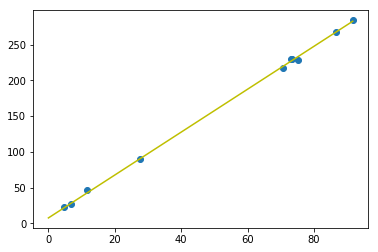

In [15]:
plt.scatter(X,Y)
t = np.arange(0.0, np.max(X), 0.01)
plt.plot(t,wb_1*t+wb_0,'-',color='y')

plt.show()

Let's plot both lines, the one obtained with the exact formula, and the one obtained with gradient descent.

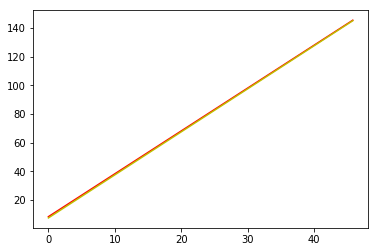

In [16]:
t = np.arange(0.0, np.max(X)/2, 0.01)
plt.plot(t,wa_1*t+wa_0,'-',color='r')
plt.plot(t,wb_1*t+wb_0,'-',color='y')

plt.show()

Even if the error is bigger than the one obtained with the exact formula, and the weights are not quite the same, the line seems to aproximate the sample set pretty well.
It is important to keep in mind that for the gradient descent algorithm we must chose the learning rate and the initial weights.

Now we're going to use this algorithms on a "real" data set. We will import to our notebook a csv file with data of house prices. We will put this data on a dataframe.

In [17]:
house_prices=pd.read_csv("houseprices.csv")

Let us explore the dataframe.

In [18]:
house_prices.head()

,Unnamed: 0,price,LotSize,Age,LandValue,LivingArea,Bedrooms,Fireplaces,Bathrooms,Rooms,Heating,Fuel,Sewer,Waterfront,NewConstruction
0,1,132500,0.09,42,50000,906,2,1,1.0,5,electric,electric,septic,No,No
1,2,181115,0.92,0,22300,1953,3,0,2.5,6,hot water/steam,gas,septic,No,No
2,3,109000,0.19,133,7300,1944,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No
3,4,155000,0.41,13,18700,1944,3,1,1.5,5,hot air,gas,septic,No,No
4,5,86060,0.11,0,15000,840,2,0,1.0,3,hot air,gas,public/commercial,No,Yes


In [19]:
house_prices[["price","LivingArea"]].head()

,price,LivingArea
0,132500,906
1,181115,1953
2,109000,1944
3,155000,1944
4,86060,840


We need to split our data set on two parts: training set and validation set.We will do it in two new dataframes. We set a seed to the random process in order to make everythin repeatable.

In [20]:
#split the dataframe into train and test sets
def trainset__testset_split(df, train_ratio=.8, seed=0):
    np.random.seed(seed)
    m = len(df.index)
    shuffle = np.random.permutation(df.index)
    train_end = int(train_ratio * m)
    train = df.loc[shuffle[:train_end]] 
    test = df.loc[shuffle[train_end:]]
    return train, test

Let's divide our set.

In [21]:
train_set, test_set= trainset__testset_split(house_prices, train_ratio=.8, seed=0)

In [22]:
train_set.head()

,Unnamed: 0,price,LotSize,Age,LandValue,LivingArea,Bedrooms,Fireplaces,Bathrooms,Rooms,Heating,Fuel,Sewer,Waterfront,NewConstruction
1318,1319,229900,0.44,7,24200,1328,3,1,2.5,8,hot air,gas,public/commercial,No,No
124,125,158000,0.52,0,4400,2098,3,0,2.0,7,hot air,gas,septic,No,Yes
648,649,367500,0.27,2,78200,2205,3,1,2.5,10,hot air,gas,public/commercial,No,No
249,250,128850,0.92,16,5500,824,3,0,1.5,5,electric,electric,septic,No,No
1599,1600,290000,0.61,34,32300,2728,4,1,2.5,10,hot water/steam,gas,public/commercial,No,No


Note that the indexes are shuffled (that is what we did to create the random partition). So in order to locate the ith row of the train set we need to use the index vector.

In [23]:
print("The index corresponding to the fourth row is: " +str(train_set.index[3]) )
print("The fourth trow is: "+ str(train_set.loc[train_set.index[0]]) ) 

The index corresponding to the fourth row is: 249
The fourth trow is: Unnamed: 0                      1319
price                         229900
LotSize                         0.44
Age                                7
LandValue                      24200
LivingArea                      1328
Bedrooms                           3
Fireplaces                         1
Bathrooms                        2.5
Rooms                              8
Heating                      hot air
Fuel                             gas
Sewer              public/commercial
Waterfront                        No
NewConstruction                   No
Name: 1318, dtype: object


We will use "LivingArea" as feature and "price" as target label.

In [24]:
X_train=train_set['LivingArea']
Y_train=train_set['price']

Let us apply the exact formula to the train set.

In [25]:
w_0,w_1=linear_regression_simple_exact_formula(X_train,Y_train)
print("w_0 = "+str(w_0))
print("w_1 = "+str(w_1))

w_0 = 17523.86959748328
w_1 = 110.38001482197082


We calculate the MSE for the training set, and we plot our model.

In [26]:
MSE_train=get_mse(X_train,Y_train,w_0,w_1)
print(np.format_float_scientific(MSE_train) )

4.424164078959671e+09


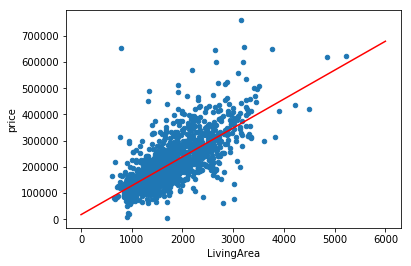

In [27]:
train_set.plot(kind="scatter", x="LivingArea",y="price")
t = np.arange(0.0, 6000.0, 0.01)
plt.plot(t,w_1*t+w_0,'-',color='r')
plt.show()

Now to evaluate our model we must see how it does on the test set.

In [28]:
X_test=test_set["LivingArea"]
Y_test=test_set["price"]
MSE_test=get_mse(X_test,Y_test,w_0,w_1)
print(np.format_float_scientific(MSE_test))

6.167989305618645e+09


In [29]:
print(np.format_float_scientific(MSE_test-MSE_train))

1.7438252266589737e+09


Let us apply gradient descent. First we must set the hyperparameters: the initial weights, the tolerance and the learning rate.

In [30]:
initial_weights = np.array([15000., 10.])
learning_rate = 1e-10
tolerance = 1e3

In [31]:
w_gd_0,w_gd_1=gradient_descent_(X_train,Y_train, learning_rate, tolerance, initial_weights[0], initial_weights[1],max_iter=200000)
print("w_0 = "+str(w_gd_0))
print("w_1 = "+str(w_gd_1))

Iteration: 0
Iteration: 1000
Iteration: 2000
Iteration: 3000
Iteration: 4000
Iteration: 5000
Iteration: 6000
Iteration: 7000
Iteration: 8000
Iteration: 9000
Iteration: 10000
Iteration: 11000
Iteration: 12000
Iteration: 13000
Iteration: 14000
Iteration: 15000
Iteration: 16000
Iteration: 17000
Iteration: 18000
Iteration: 19000
Converged on iteration: 19720
w_0 = 15000.052684721915
w_1 = 111.66088687684002


Let's calculate the cost for these weights and the difference with the ones we obtained with the exact formula.

In [32]:
MSE_train_gradient_desc=get_mse(X_train,Y_train,w_gd_0,w_gd_1)
print(np.format_float_scientific(MSE_train_gradient_desc))

4.424858739373583e+09


In [33]:
print(np.format_float_scientific(MSE_train_gradient_desc-MSE_train))

6.946604139118195e+05


Next we calculate the predictions of a data sample, to see how the algorithms do in a particular case:

In [34]:
print("Prediction with the exact formula: "+str(predictions_linear_reg(X_train[10], w_0, w_1)))
print("Prediction with gradient descent: "+str(predictions_linear_reg(X_train[10],w_gd_0,w_gd_1)))
print("Actual value: "+str(Y_train[10]))

Prediction with the exact formula: 336963.6324922668
Prediction with gradient descent: 338146.65930629696
Actual value: 325000


Now we plot the line obtained with gradient descent.

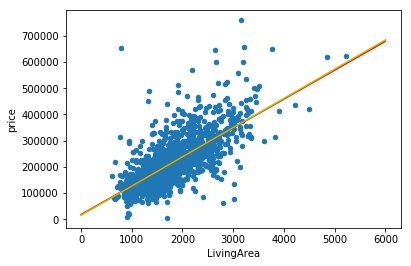

In [35]:
train_set.plot(kind="scatter", x="LivingArea",y="price")
t = np.arange(0.0, 6000.0, 0.01)
plt.plot(t,w_1*t+w_0,'-',color='r')
plt.plot(t,w_gd_1*t+w_gd_0,'-',color='y')
plt.show()

Let's evaluate on the test set.

In [36]:
#MSE of the test set for the Gradient Descent model
MSE_test_gradient_desdent=get_mse(X_test,Y_test,w_gd_0,w_gd_1)
print(np.format_float_scientific(MSE_test_gradient_desdent))

6.157272972030508e+09


In [37]:
#Difference bewtween the exact formula MSE and the gradient descent MSE for the test set
print(np.format_float_scientific(MSE_test_gradient_desdent-MSE_test))

-1.0716333588136673e+07


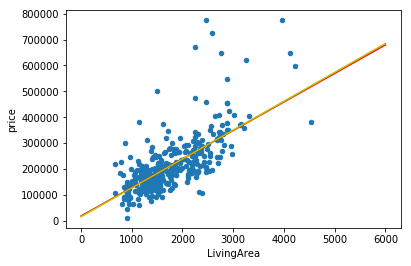

In [38]:
#Plot of the lines and the test set
test_set.plot(kind="scatter", x="LivingArea",y="price")
t = np.arange(0.0, 6000.0, 0.01)
plt.plot(t,w_1*t+w_0,'-',color='r')
plt.plot(t,w_gd_1*t+w_gd_0,'-',color='y')
plt.show()

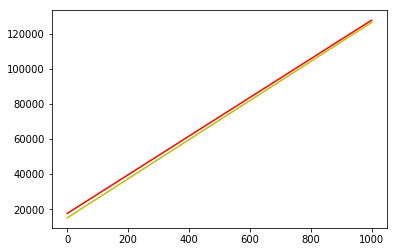

In [39]:
#Plot of both models
t = np.arange(0.0, 1000.0, 0.01)
plt.plot(t,w_1*t+w_0,'-',color='r')
plt.plot(t,w_gd_1*t+w_gd_0,'-',color='y')
plt.show()

Of course we can chose a different feature (as long as it is "numeric") and apply our algorithms. Let's do it with "Bedrooms".

In [40]:
X_train2=train_set['Bedrooms']
#Y is the same.

In [41]:
#with the exact formula:
w_0,w_1=linear_regression_simple_exact_formula(X_train2,Y_train)
print("w_0 = "+str(w_0))
print("w_1 = "+str(w_1))

w_0 = 67935.88943380417
w_1 = 45383.48861454356


In [42]:
MSE_train=get_mse(X_train2,Y_train,w_0,w_1)
print(np.format_float_scientific(MSE_train) )

7.591225147768781e+09


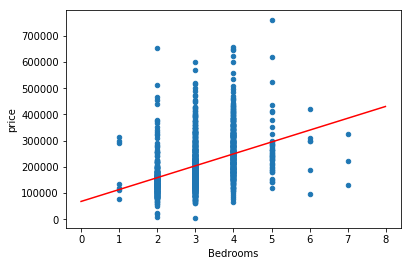

In [43]:
train_set.plot(kind="scatter", x="Bedrooms",y="price")
t = np.arange(0.0, 8.0, 0.01)
plt.plot(t,w_1*t+w_0,'-',color='r')

plt.show()

This does not look right, it could be that "Bedrooms" is not a good feature to predict the price. Anyway, let's se what happens on the test set.

In [44]:
X_test2=test_set["Bedrooms"]
MSE_test=get_mse(X_test2,Y_test,w_0,w_1)
print(np.format_float_scientific(MSE_test))

1.032642167777961e+10


In [45]:
print(np.format_float_scientific(MSE_test-MSE_train))

2.735196530010829e+09


Now let's apply gradient descent.

In [46]:
initial_weights = np.array([20000., 10000.])
learning_rate = 1e-4
tolerance = 5e3

In [47]:
w_gd_0,w_gd_1=gradient_descent_(X_train2,Y_train, learning_rate, tolerance, initial_weights[0], initial_weights[1],max_iter=200000)
print("w_0 = "+str(w_gd_0))
print("w_1 = "+str(w_gd_1))

Iteration: 0
Iteration: 1000
Iteration: 2000
Converged on iteration: 2575
w_0 = 34585.14641332293
w_1 = 55187.145969574485


Let's calculate the cost and plot the line.

In [48]:
MSE_train_gd=get_mse(X_train2,Y_train,w_gd_0,w_gd_1)
print(np.format_float_scientific(MSE_train_gd) )

7.663564259591805e+09


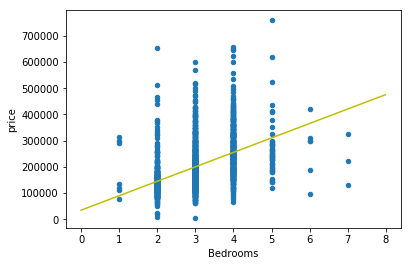

In [49]:
train_set.plot(kind="scatter", x="Bedrooms",y="price")
t = np.arange(0.0, 8.0, 0.01)
plt.plot(t,w_gd_1*t+w_gd_0,'-',color='y')

plt.show()

This is the cost for the test set:

In [50]:
MSE_test_gd=get_mse(X_test2,Y_test,w_gd_0,w_gd_1)
print(np.format_float_scientific(MSE_test_gd))

1.0223051376066265e+10


Now we plot the two models and the whole data set.

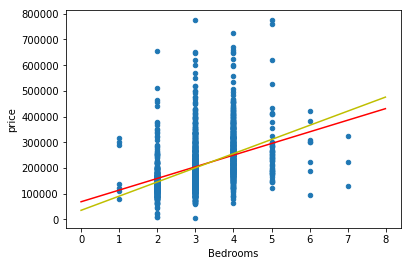

In [51]:
house_prices.plot(kind="scatter", x="Bedrooms",y="price")
t = np.arange(0.0, 8.0, 0.01)
plt.plot(t,w_1*t+w_0,'-',color='r')
plt.plot(t,w_gd_1*t+w_gd_0,'-',color='y')

plt.show()